# Image Processing with Python: Digital Image Sampling and Quantization

by: Jephraim C. Manansala | Published on https://jephraim-manansala.medium.com/

### How high-definition is high-definition?

In this post, we will be exploring how image resolution is represented in computer vision. More specifically, we will be looking at how the spatial resolution and intensity value discretization can affect the image’s overall quality.

Let’s begin.

As usual, we import libraries such as `numpy`, and `matplotlib`. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread

But first, let us define what image sampling is. **Image sampling** involves taking the value of the image at regular spatial intervals. The length of the intervals defines the spatial resolution of the image.

To better explain this, let us try to sample an analog image of a circle where N is the number of pixels on the side of the image.

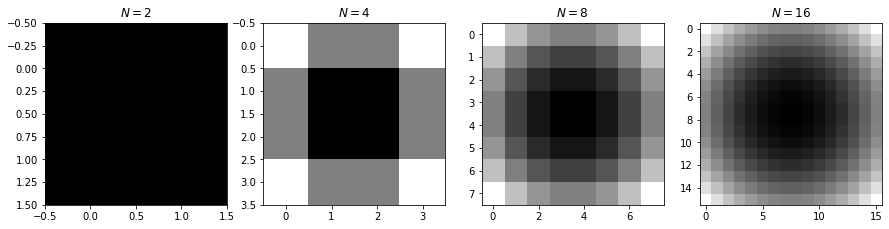

In [2]:
def circle_image(x, y):
    X, Y = np.meshgrid(x, y)
    return X**2 + Y**2

factors = 2**np.arange(1, 5)
fig, ax = plt.subplots(1, len(factors), figsize=(15, 4))
for i, N in enumerate(factors):
    image = circle_image(np.linspace(-1, 1, num=N), np.linspace(-1, 1, num=N))
    ax[i].imshow(image, cmap='gray')
    ax[i].set_title('$N = {}$'.format(N))

As we can observe, the image’s resolution is better, and the points are much denser as N increases. This signifies that as we increase the number of pixels in the image, we can better represent an analog object into a digital image.

Let’s try this in an actual image. Here I have an image of a pizza.

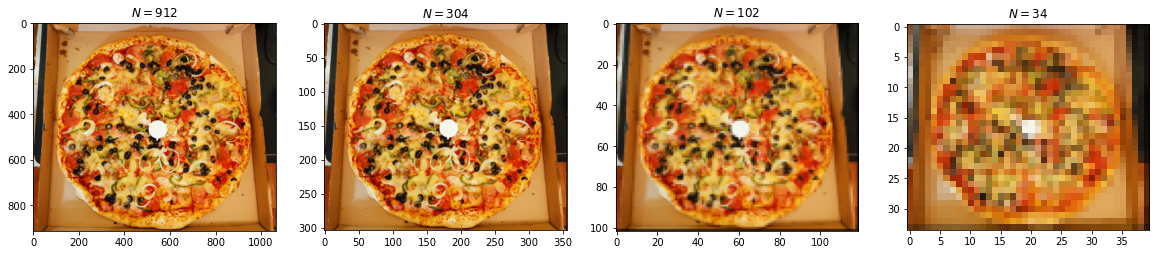

In [3]:
pizza = imread('pizza.jpg')

from skimage.transform import downscale_local_mean
factors = 3**np.arange(1, 5)
figure, axis = plt.subplots(1, len(factors), figsize=(20, 6))
for factor, ax in zip(factors, axis):
    image = downscale_local_mean(pizza, 
                                 factors=(factor, factor, 1)).astype(int)
    ax.imshow(image)
    ax.set_title('$N={}$'.format(image.shape[0]))

In the first two images, we can observe that there is not much of a difference. This signifies that unless we need to zoom in on the image, we do not require a higher resolution on the image to understand the image’s details better.

However, as we further decrease the sampling on the image’s spatial resolution, it is clear that the image is no longer clear. Lots of information is lost, and the digital image cannot fully represent the analog object.


I hope that is clear. The next concept that we need to understand is **image quantization**. Image quantization involves discretizing the intensity values of the analog image.

To demonstrate this, let us try to discretize an analog image of a circle where k is the number of bits representing an intensity value.

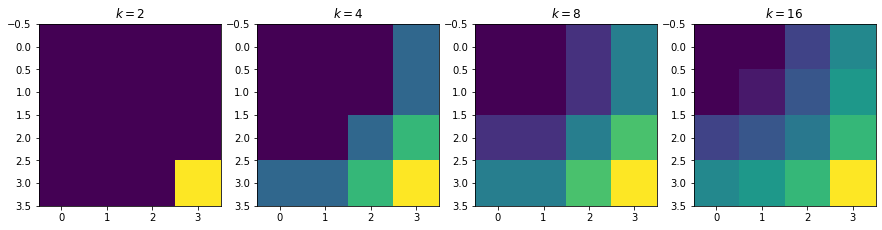

In [4]:
def circle_image(x, y):
    X, Y = np.meshgrid(x, y)
    return X**2 + Y**2

factors = 2**np.arange(1, 5)
circ_image = circle_image(np.linspace(0, 1, num=4), 
                          np.linspace(0, 1, num=4))
fig, ax = plt.subplots(1, len(factors), figsize=(15, 4))
for i, k in enumerate(factors):
    bins = np.linspace(0, circ_image.max(), k)
    image = np.digitize(circ_image, bins)
    image = np.vectorize(bins.tolist().__getitem__)(image-1)
    ax[i].imshow(image)
    ax[i].set_title('$k = {}$'.format(k))

As we can observe, the color representation of the image is much better as k increases. This signifies that as we increase the number of discrete values representing the image intensity values in the image, the better we can represent an analog object into a digital image.

Again, let’s try this in our image of a pizza.

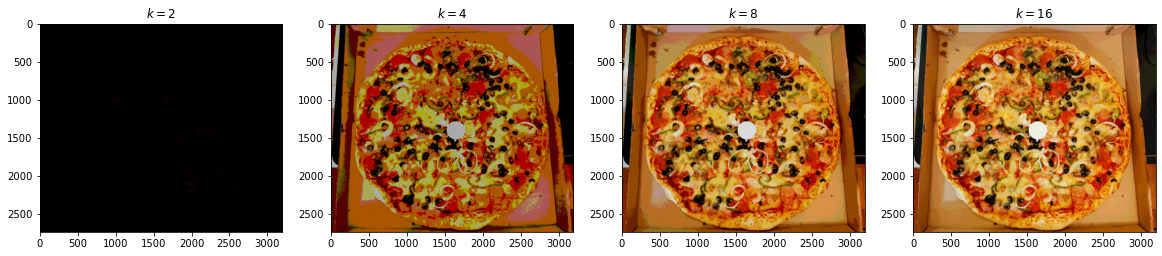

In [5]:
factors = 2**np.arange(1, 5)
figure, axis = plt.subplots(1, len(factors), figsize=(20, 6))
for k, ax in zip(factors, axis):
    bins = np.linspace(0, pizza.max(), k)
    image = np.digitize(pizza, bins)
    image = (np.vectorize(bins.tolist().__getitem__)
                         (image-1).astype(int))
    ax.imshow(image)
    ax.set_title('$k = {}$'.format(k))

On the lower spectrum, we can see that as we further decrease the image’s discretization, the image quality degradation becomes more apparent. This comes to the point where the digital image can no longer represent the analog object’s varying shades of color due to the limited intensity value range.

On the higher spectrum, we can observe that there is not much of a difference. This signifies that there is a limit on how much discrete intensity values the human eye can perceive. If we further increase the number of discrete intensity values, there will be little to no difference in the image’s quality.

#### In summary

We have explored how image quality can be improved and degraded using image sampling and quantization. Too little sampling or quantization of images can drastically degrade its quality, whereas too much can have no incremental improvement in image quality.